In [119]:
#Importing Data manipulation and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [120]:
# Import TFIDF library
from sklearn.feature_extraction.text import TfidfVectorizer
# Import library for stemming words
from nltk.stem.porter import PorterStemmer
# Import regular expression library
import re
# import library to perform String operations
import string 

In [121]:
#Importing libraries for Data pre-processing
from sklearn.preprocessing import StandardScaler

In [122]:
#Importing model for Dimentionality Reduction
from sklearn.decomposition import PCA

In [123]:
#Importing libraries for performance measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve

In [124]:
# Import Classifier library
from sklearn.ensemble import RandomForestClassifier

In [125]:
#Importing libraries For data splitting
from sklearn.model_selection import train_test_split

**Loading files containing positive & negative reviews and combining them together to create a single list**

In [126]:
path_neg = "/home/ashok/Documents/exercise/train/neg"
path_pos = "/home/ashok/Documents/exercise/train/pos"

In [127]:
# Function to Read files
def readFiles(fileList):
    lines = []
    for i in fileList:
        text_file = open(i, "r",  encoding="utf8")
        tx = text_file.readlines()
        tx = " ".join(tx)
        lines.append(tx)
    return(lines)

In [128]:
# Read all files in 'neg' folder
os.chdir(path_neg)
neg_fileList = os.listdir()
neg_files_list = readFiles(neg_fileList)
len(neg_files_list)

1000

In [129]:
# Read all files in 'pos' folder
os.chdir(path_pos)
pos_fileList = os.listdir()
pos_files_list = readFiles(pos_fileList)
len(pos_files_list)

1000

In [130]:
# Merge the two lists
comb_files = neg_files_list + pos_files_list
len(comb_files)

2000

In [131]:
# Clean the list of strings
def cleanTxt(listOfStrings):
    lines = []
    for tx in listOfStrings:
        clean = re.compile('<.*?>')
        tx = re.sub(clean, '', tx)
        tx= re.sub(r'[\[0-9\]]',' ', tx)
        tx= re.sub('\n',' ', tx)
        tx= re.sub('\'s',' ', tx)
        tx= re.sub('\'s',' ', tx)
        # 4.3.3 Replace URLs
        tx = re.sub(r'^https?:\/\/.*[\r\n]*', '', tx, flags=re.MULTILINE)
        tx = re.sub('[*|\(\)\{\}]', " ",tx)
        tx = re.sub('[=]*', "",tx)
        clean = re.compile('&lt;')
        tx = re.sub(clean, '', tx)
        clean = re.compile('&gt;')
        tx = re.sub(clean, '', tx)
        clean = re.compile('&quot;')
        tx = re.sub(clean, '', tx)
        tx = tx.translate(tx.maketrans("","",string.punctuation))
        lines.append(tx)
    return lines


In [132]:
cleaned_lines = cleanTxt(comb_files)
cleaned_lines[0]

'plunkett  macleane marks the directing debut of jake scott  brother of ridley and tony    naturally  this got me worried    would jake  talent be inherited from ridley or tony    if it was from ridley  than the movie would be a thoughtful suspensor with action thrown in    if it was from tony  it would be wham bang drivel    unfortunately  the latter is true for this worthless picture with little charm    carlyle and miller are the titular highwaymen  plunkett   carlyle   who is poor and unruly  and captain james macleane   miller   a clean cut gentleman    as the tagline clearly wants to make known  they rob the rich and nothing else    the film basically follows the rowdy hold ups the two stage  along with romantic interludes with lady rebecca   tyler      hot on both their tails is mr chance   ken stott   who wants to see them both dead    plunkett  macleane is an annoying little film that serves little purpose    although undoubtedly slick and fast paced  there  very little merit 

In [133]:
len(cleaned_lines)

2000

**Creating tokens using Porter Stemmer**

In [134]:
porter_stemmer = PorterStemmer()

In [135]:
# Define a function to use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = str_input.split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

In [136]:
# Creating tokens and storing in a list
new_lines = []
for line in cleaned_lines:
    #print(line)
    stemmed_line = stemming_tokenizer(line)
    stemmed_line = " ".join(stemmed_line)    # Join words back into a string
    new_lines.append(stemmed_line)
len(new_lines)

2000

In [137]:
new_lines[0]

'plunkett maclean mark the direct debut of jake scott brother of ridley and toni natur thi got me worri would jake talent be inherit from ridley or toni if it wa from ridley than the movi would be a thought suspensor with action thrown in if it wa from toni it would be wham bang drivel unfortun the latter is true for thi worthless pictur with littl charm carlyl and miller are the titular highwaymen plunkett carlyl who is poor and unruli and captain jame maclean miller a clean cut gentleman as the taglin clearli want to make known they rob the rich and noth els the film basic follow the rowdi hold up the two stage along with romant interlud with ladi rebecca tyler hot on both their tail is mr chanc ken stott who want to see them both dead plunkett maclean is an annoy littl film that serv littl purpos although undoubtedli slick and fast pace there veri littl merit contain in the film carlyl and miller are fun enough as the foul mouth pair although their charact are crimin undevelop it ap

In [138]:
# Transform text to tf-idf matrix

vec = TfidfVectorizer(use_idf=True,
                      strip_accents = 'unicode', # Remove accents during preprocessing step.
                      lowercase = True,
                      tokenizer=stemming_tokenizer,
                      max_features = 10000,   # Consider only top frequent features
                      stop_words='english'  # Remove stop-words
                      )

In [139]:
# Fit & transform using 'vec' object & create a sparse matrix
data = vec.fit_transform(cleaned_lines)
data
data.shape

<2000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 442313 stored elements in Compressed Sparse Row format>

(2000, 10000)

**Splitting data into train and test**

In [140]:
# Creating a dataframe
df = pd.DataFrame(data.toarray(), columns=vec.get_feature_names())
df.head()

,,aaron,abandon,abbi,abduct,aberdeen,abigail,abil,abl,abli,...,zip,zoe,zombi,zone,zoo,zooland,zoom,zorro,zucker,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Create target labels
target = [0] * 1000 + [1] * 1000
target[990:1010]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [142]:
df['Sentiment'] = target
df.shape

(2000, 10001)

In [143]:
X = df.iloc[:,0:10000]
X.head()

,,aaron,abandon,abbi,abduct,aberdeen,abigail,abil,abl,abli,...,zip,zoe,zombi,zone,zoo,zooland,zoom,zorro,zucker,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
y=df.iloc[:,10000]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Sentiment, dtype: int64

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle = True
                                                    )

In [146]:
print('X_test shape :',X_test.shape)
print('X_train shape:',X_train.shape)
print('y_test shape :',y_test.shape)
print('y_train shape:',y_train.shape)

X_test shape : (600, 10000)
X_train shape: (1400, 10000)
y_test shape : (600,)
y_train shape: (1400,)


**Random Forest Modeling**

In [147]:
rf = RandomForestClassifier(n_estimators=2000,n_jobs=2)
rf1 = rf.fit(X_train,y_train)

y_pred_rf = rf1.predict(X_test)

y_pred_rf_prob = rf1.predict_proba(X_test)

print('Accuracy for RF:',accuracy_score(y_test,y_pred_rf))


Accuracy for RF: 0.8183333333333334


In [148]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_rf))

p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
print('Precision:',p_rf)
print('Recall',r_rf)
print('Precision',f_rf)

Confusion Matrix:
 [[249  48]
 [ 61 242]]
Precision: [0.80322581 0.83448276]
Recall [0.83838384 0.79867987]
Precision [0.82042834 0.81618887]


Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'ROC curve for Random Forest')

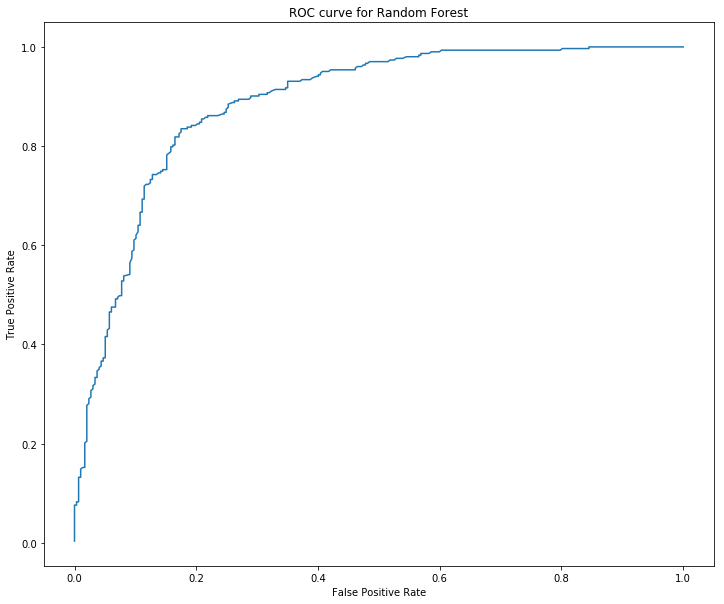

In [149]:

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Random Forest')
ax.plot(fpr_rf, tpr_rf, label = "rf")

**Multinomial Naive Bayes**

**The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).**

In [150]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb = clf.fit(X_train, y_train)

y_pred_mnb = mnb.predict(X_test)

y_pred_mnb_prob = mnb.predict_proba(X_test)

print('Accuracy for MNB:',accuracy_score(y_test,y_pred_mnb))

Accuracy for MNB: 0.8033333333333333


In [154]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_mnb))

p_mnb,r_mnb,f_mnb,_ = precision_recall_fscore_support(y_test,y_pred_mnb)
print('Precision:',p_mnb)
print('Recall',r_mnb)
print('Precision',f_mnb)

Confusion Matrix:
 [[252  45]
 [ 73 230]]
Precision: [0.77538462 0.83636364]
Recall [0.84848485 0.75907591]
Precision [0.81028939 0.79584775]


Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'ROC curve for Naive Bayes Multinomial NB')

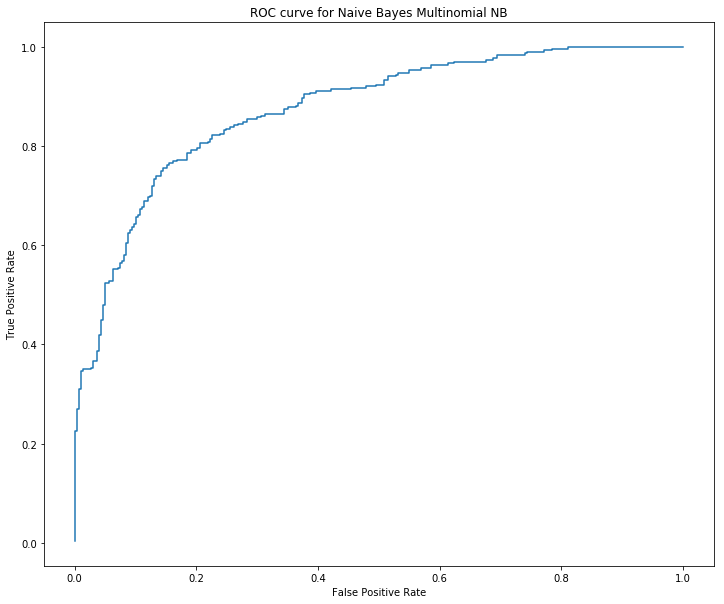

In [155]:

fpr_mnb, tpr_mnb, thresholds = roc_curve(y_test,
                                 y_pred_mnb_prob[: , 1],
                                 pos_label= 1
                                 )

fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for Multinomial Naive Bayes')
ax.plot(fpr_mnb, tpr_mnb, label = "mnb")